In [25]:
# Import all dependencies

import datetime, time, os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
import json

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

import warnings
warnings.filterwarnings('ignore')

In [26]:
# read csv in the dataframe

df= pd.read_csv("ane_energy/df_merged.csv", parse_dates=['dt_start_utc'], index_col='dt_start_utc')

In [27]:
df.head()

,50Hertz_power_mw_x,DE_power_mw_x,DK_power_mw_x,DK1_power_mw_x,TTG_power_mw_x,total_pred_cons,Wasserkraft,Wind Onshore[MWh],Sonstige Erneuerbare[MWh],Kernenergie[MWh],...,rz_saldo_roll_diff_16_2,epex_diff,epex_roll_win8,epex_roll_win2,epex_roll_diff_16_2,fac_epex_rz_saldo,weekday,businessday,businesshours,rz_saldo_mwh_sign
dt_start_utc,,,,,,,,,,,,,,,,,,,,,
2021-01-01 06:15:00,915.0,2337.0,81.0,41.0,730.0,4104.0,287.0,552.0,56.0,2.036,...,21.2500,0.163778,39.865196,40.007385,0.151559,-966.090674,4,1,1,-1.0
2021-01-01 06:30:00,910.0,2342.0,81.0,41.0,738.0,4112.0,286.0,536.0,56.0,2.036,...,48.5000,0.163052,39.929604,40.171526,-0.083814,-3233.346434,4,1,1,-1.0
2021-01-01 06:45:00,906.0,2352.0,81.0,41.0,748.0,4128.0,286.0,505.0,57.0,2.039,...,20.5000,0.294637,40.054093,40.368019,-0.289428,1058.498157,4,1,1,1.0
2021-01-01 07:00:00,903.0,2363.0,84.0,52.0,759.0,4161.0,287.0,514.0,57.0,2.039,...,-46.1875,0.558532,40.259093,40.663019,-0.529428,2187.310000,4,1,1,1.0
2021-01-01 07:15:00,882.0,2361.0,84.0,52.0,777.0,4156.0,290.0,510.0,57.0,2.039,...,-69.5000,0.822428,40.565033,41.122681,-0.867957,3072.747225,4,1,1,1.0


In [28]:
df.shape

(17292, 74)

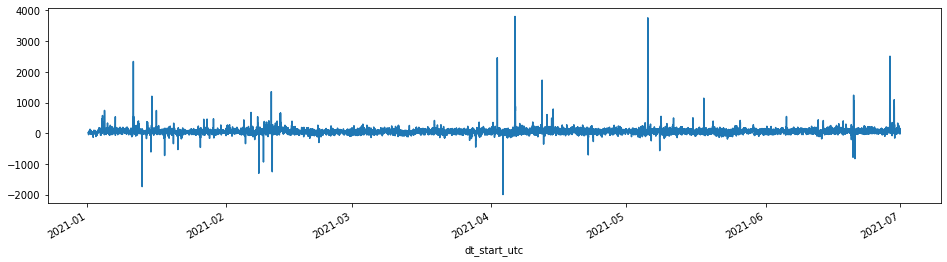

In [30]:
# Let's illustrate the data

df["rebap_eur_mwh"].plot(figsize=(16,4));

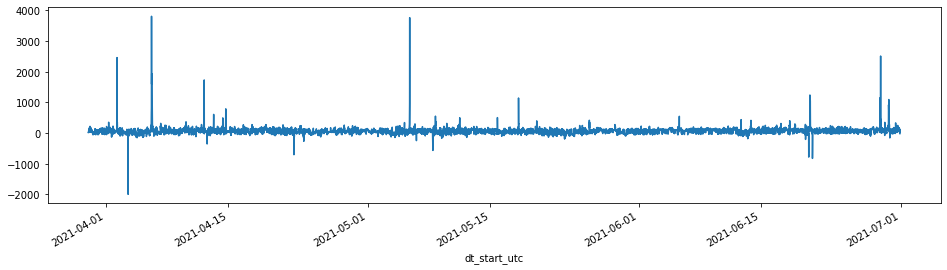

In [45]:
# The way we access our timestamp values now changes

df["rebap_eur_mwh"]['2021-03-30':'2021-06-30'].plot(figsize=(16,4));

In [31]:
# we can easily calculate the mean per year

df.resample('Y').mean().head()

,50Hertz_power_mw_x,DE_power_mw_x,DK_power_mw_x,DK1_power_mw_x,TTG_power_mw_x,total_pred_cons,Wasserkraft,Wind Onshore[MWh],Sonstige Erneuerbare[MWh],Kernenergie[MWh],...,rz_saldo_roll_diff_16_2,epex_diff,epex_roll_win8,epex_roll_win2,epex_roll_diff_16_2,fac_epex_rz_saldo,weekday,businessday,businesshours,rz_saldo_mwh_sign
dt_start_utc,,,,,,,,,,,,,,,,,,,,,
2021-12-31,3698.055922,10840.317546,1079.399318,883.551122,4517.622658,21018.946565,422.808293,139.321202,46.721663,1.85,...,0.063487,0.002172,54.960827,54.96626,-0.018318,-741.250706,2.999075,0.711948,-0.167014,-0.062341


In [32]:
# calculating the mean per 1 hour

df.resample('1H').mean().head()

,50Hertz_power_mw_x,DE_power_mw_x,DK_power_mw_x,DK1_power_mw_x,TTG_power_mw_x,total_pred_cons,Wasserkraft,Wind Onshore[MWh],Sonstige Erneuerbare[MWh],Kernenergie[MWh],...,rz_saldo_roll_diff_16_2,epex_diff,epex_roll_win8,epex_roll_win2,epex_roll_diff_16_2,fac_epex_rz_saldo,weekday,businessday,businesshours,rz_saldo_mwh_sign
dt_start_utc,,,,,,,,,,,,,,,,,,,,,
2021-01-01 06:00:00,910.333333,2343.666667,81.0,41.0,738.666667,4114.666667,286.333333,531.00,56.333333,2.03700,...,30.083333,0.207156,39.949631,40.182310,-0.073894,-1046.979650,4,1,1,-0.333333
2021-01-01 07:00:00,870.500000,2356.750000,84.0,52.0,784.000000,4147.250000,290.000000,509.75,57.000000,2.03900,...,-52.296875,0.875433,40.836194,41.571864,-1.190370,2504.115650,4,1,1,1.000000
2021-01-01 08:00:00,748.500000,2240.500000,92.0,61.0,811.750000,3953.750000,289.750000,501.00,57.000000,2.03825,...,-75.437500,0.185911,43.014843,44.457823,-2.988632,3942.649683,4,1,1,1.000000
2021-01-01 09:00:00,619.000000,2105.750000,100.0,68.0,841.750000,3734.500000,288.000000,533.75,57.000000,2.03925,...,-9.984375,0.342227,44.843652,45.229481,-2.389558,2149.280250,4,1,1,1.000000
2021-01-01 10:00:00,579.500000,2168.750000,100.0,67.0,941.500000,3856.750000,291.000000,546.00,57.000000,2.04025,...,-29.859375,1.076976,46.338401,47.447321,-2.770699,4609.666535,4,1,1,1.000000


In [33]:
# apply calculation, the spread per month:

df.resample("M").apply(lambda x: np.max(x) - np.min(x)).head()

,50Hertz_power_mw_x,DE_power_mw_x,DK_power_mw_x,DK1_power_mw_x,TTG_power_mw_x,total_pred_cons,Wasserkraft,Wind Onshore[MWh],Sonstige Erneuerbare[MWh],Kernenergie[MWh],...,rz_saldo_roll_diff_16_2,epex_diff,epex_roll_win8,epex_roll_win2,epex_roll_diff_16_2,fac_epex_rz_saldo,weekday,businessday,businesshours,rz_saldo_mwh_sign
dt_start_utc,,,,,,,,,,,,,,,,,,,,,
2021-01-31,14223.0,37821.0,3335.0,2737.0,14881.0,71473.0,197.0,996.000,14.0,0.378,...,731.4375,13.553838,109.082344,111.190235,54.702832,57367.480000,6,1,2,2.0
2021-02-28,12324.0,29912.0,3248.0,2639.0,13031.0,56236.0,178.0,994.000,16.0,0.452,...,730.8125,24.973498,135.449429,141.891418,73.490973,65365.889571,6,1,2,2.0
2021-03-31,14576.0,39161.0,4173.0,3426.0,15555.0,74448.0,195.0,998.000,14.0,0.764,...,780.9375,24.276022,149.950442,157.862766,74.990747,52069.800248,6,1,2,2.0
2021-04-30,11926.0,32553.0,3950.0,3314.0,13293.0,64388.0,226.0,997.998,15.0,0.639,...,800.9375,25.775121,170.201999,179.404722,74.491575,71657.982513,6,1,2,2.0
2021-05-31,14085.0,38368.0,3181.0,2639.0,15283.0,70803.0,316.0,998.000,11.0,0.680,...,1050.2500,25.232811,168.650791,172.482781,80.821068,70892.319799,6,1,2,2.0


In [34]:
# Finally, we create a daily data frame.

df_daily = df.resample("D").sum()
df_daily.head()

,50Hertz_power_mw_x,DE_power_mw_x,DK_power_mw_x,DK1_power_mw_x,TTG_power_mw_x,total_pred_cons,Wasserkraft,Wind Onshore[MWh],Sonstige Erneuerbare[MWh],Kernenergie[MWh],...,rz_saldo_roll_diff_16_2,epex_diff,epex_roll_win8,epex_roll_win2,epex_roll_diff_16_2,fac_epex_rz_saldo,weekday,businessday,businesshours,rz_saldo_mwh_sign
dt_start_utc,,,,,,,,,,,,,,,,,,,,,
2021-01-01,67254.0,253208.0,7403.0,4435.0,125625.0,457925.0,20931.0,29102.811000,4041.0,144.741002,...,-683.6250,3.219712,3550.383201,3563.877504,-52.612487,66767.302730,284,71,31,15.0
2021-01-02,81804.0,269935.0,10924.0,8968.0,115767.0,487398.0,27702.0,38419.393000,5435.0,195.239002,...,-276.8750,0.507364,4853.197805,4852.211584,4.925357,387455.242071,480,0,-96,66.0
2021-01-03,537982.0,1380327.0,116620.0,86376.0,657042.0,2778347.0,27256.0,322.770000,5472.0,183.080000,...,1121.0625,-17.980627,3674.757232,3639.591659,111.012178,-139392.798633,576,0,-96,-16.0
2021-01-04,358859.0,1252086.0,125304.0,94492.0,680926.0,2511667.0,29058.0,277.679000,5472.0,181.688001,...,316.3125,13.541283,4625.711488,4646.076633,-76.250988,-416475.267714,0,96,16,-46.0
2021-01-05,369976.0,1115880.0,127944.0,96380.0,559571.0,2269751.0,32020.0,230.208999,5460.0,186.951002,...,-408.0625,3.758520,5326.036800,5337.929736,-30.760991,-273081.668462,96,96,16,-42.0


In [35]:
# getting the weekofyear
(
    df_daily
    .assign(weekofyear = lambda df: df.index.weekofyear)
    .head()
)

,50Hertz_power_mw_x,DE_power_mw_x,DK_power_mw_x,DK1_power_mw_x,TTG_power_mw_x,total_pred_cons,Wasserkraft,Wind Onshore[MWh],Sonstige Erneuerbare[MWh],Kernenergie[MWh],...,epex_diff,epex_roll_win8,epex_roll_win2,epex_roll_diff_16_2,fac_epex_rz_saldo,weekday,businessday,businesshours,rz_saldo_mwh_sign,weekofyear
dt_start_utc,,,,,,,,,,,,,,,,,,,,,
2021-01-01,67254.0,253208.0,7403.0,4435.0,125625.0,457925.0,20931.0,29102.811000,4041.0,144.741002,...,3.219712,3550.383201,3563.877504,-52.612487,66767.302730,284,71,31,15.0,53
2021-01-02,81804.0,269935.0,10924.0,8968.0,115767.0,487398.0,27702.0,38419.393000,5435.0,195.239002,...,0.507364,4853.197805,4852.211584,4.925357,387455.242071,480,0,-96,66.0,53
2021-01-03,537982.0,1380327.0,116620.0,86376.0,657042.0,2778347.0,27256.0,322.770000,5472.0,183.080000,...,-17.980627,3674.757232,3639.591659,111.012178,-139392.798633,576,0,-96,-16.0,53
2021-01-04,358859.0,1252086.0,125304.0,94492.0,680926.0,2511667.0,29058.0,277.679000,5472.0,181.688001,...,13.541283,4625.711488,4646.076633,-76.250988,-416475.267714,0,96,16,-46.0,1
2021-01-05,369976.0,1115880.0,127944.0,96380.0,559571.0,2269751.0,32020.0,230.208999,5460.0,186.951002,...,3.758520,5326.036800,5337.929736,-30.760991,-273081.668462,96,96,16,-42.0,1


In [36]:
df_daily["rebap_eur_mwh"]

dt_start_utc
2021-01-01     2326.49
2021-01-02     1171.17
2021-01-03     4994.64
2021-01-04    11738.02
2021-01-05     7247.50
                ...   
2021-06-26     4934.32
2021-06-27     7235.42
2021-06-28    15497.29
2021-06-29    14271.10
2021-06-30     9543.18
Freq: D, Name: rebap_eur_mwh, Length: 181, dtype: float64

In [37]:
# create a new variable for electricity consumption during the previous day

(
    df_daily
    .assign(rebap_eur_mwh_yesterday = lambda df: df_daily["rebap_eur_mwh"].shift(1))
    .assign(rebap_eur_mwh_increase = lambda df: df_daily["rebap_eur_mwh"] - df.rebap_eur_mwh_yesterday)
    .head()
)

,50Hertz_power_mw_x,DE_power_mw_x,DK_power_mw_x,DK1_power_mw_x,TTG_power_mw_x,total_pred_cons,Wasserkraft,Wind Onshore[MWh],Sonstige Erneuerbare[MWh],Kernenergie[MWh],...,epex_roll_win8,epex_roll_win2,epex_roll_diff_16_2,fac_epex_rz_saldo,weekday,businessday,businesshours,rz_saldo_mwh_sign,rebap_eur_mwh_yesterday,rebap_eur_mwh_increase
dt_start_utc,,,,,,,,,,,,,,,,,,,,,
2021-01-01,67254.0,253208.0,7403.0,4435.0,125625.0,457925.0,20931.0,29102.811000,4041.0,144.741002,...,3550.383201,3563.877504,-52.612487,66767.302730,284,71,31,15.0,NaN,NaN
2021-01-02,81804.0,269935.0,10924.0,8968.0,115767.0,487398.0,27702.0,38419.393000,5435.0,195.239002,...,4853.197805,4852.211584,4.925357,387455.242071,480,0,-96,66.0,2326.49,-1155.32
2021-01-03,537982.0,1380327.0,116620.0,86376.0,657042.0,2778347.0,27256.0,322.770000,5472.0,183.080000,...,3674.757232,3639.591659,111.012178,-139392.798633,576,0,-96,-16.0,1171.17,3823.47
2021-01-04,358859.0,1252086.0,125304.0,94492.0,680926.0,2511667.0,29058.0,277.679000,5472.0,181.688001,...,4625.711488,4646.076633,-76.250988,-416475.267714,0,96,16,-46.0,4994.64,6743.38
2021-01-05,369976.0,1115880.0,127944.0,96380.0,559571.0,2269751.0,32020.0,230.208999,5460.0,186.951002,...,5326.036800,5337.929736,-30.760991,-273081.668462,96,96,16,-42.0,11738.02,-4490.52


In [38]:
df_daily.head()

,50Hertz_power_mw_x,DE_power_mw_x,DK_power_mw_x,DK1_power_mw_x,TTG_power_mw_x,total_pred_cons,Wasserkraft,Wind Onshore[MWh],Sonstige Erneuerbare[MWh],Kernenergie[MWh],...,rz_saldo_roll_diff_16_2,epex_diff,epex_roll_win8,epex_roll_win2,epex_roll_diff_16_2,fac_epex_rz_saldo,weekday,businessday,businesshours,rz_saldo_mwh_sign
dt_start_utc,,,,,,,,,,,,,,,,,,,,,
2021-01-01,67254.0,253208.0,7403.0,4435.0,125625.0,457925.0,20931.0,29102.811000,4041.0,144.741002,...,-683.6250,3.219712,3550.383201,3563.877504,-52.612487,66767.302730,284,71,31,15.0
2021-01-02,81804.0,269935.0,10924.0,8968.0,115767.0,487398.0,27702.0,38419.393000,5435.0,195.239002,...,-276.8750,0.507364,4853.197805,4852.211584,4.925357,387455.242071,480,0,-96,66.0
2021-01-03,537982.0,1380327.0,116620.0,86376.0,657042.0,2778347.0,27256.0,322.770000,5472.0,183.080000,...,1121.0625,-17.980627,3674.757232,3639.591659,111.012178,-139392.798633,576,0,-96,-16.0
2021-01-04,358859.0,1252086.0,125304.0,94492.0,680926.0,2511667.0,29058.0,277.679000,5472.0,181.688001,...,316.3125,13.541283,4625.711488,4646.076633,-76.250988,-416475.267714,0,96,16,-46.0
2021-01-05,369976.0,1115880.0,127944.0,96380.0,559571.0,2269751.0,32020.0,230.208999,5460.0,186.951002,...,-408.0625,3.758520,5326.036800,5337.929736,-30.760991,-273081.668462,96,96,16,-42.0


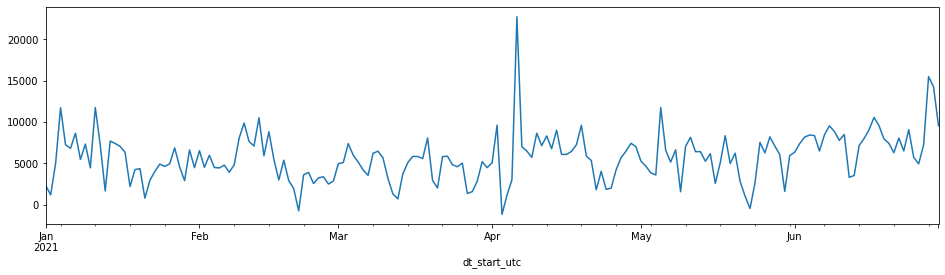

In [39]:
# illustrate consumption during the previous day

df_daily["rebap_eur_mwh"].plot(figsize=(16,4));

### Rolling and Smoothing

Let us have a closer look at the power consumption patterns during a single year. The simplest way to plot timestamp data dynamics in Pandas is using plot(), which by default plots a linear plot over time:

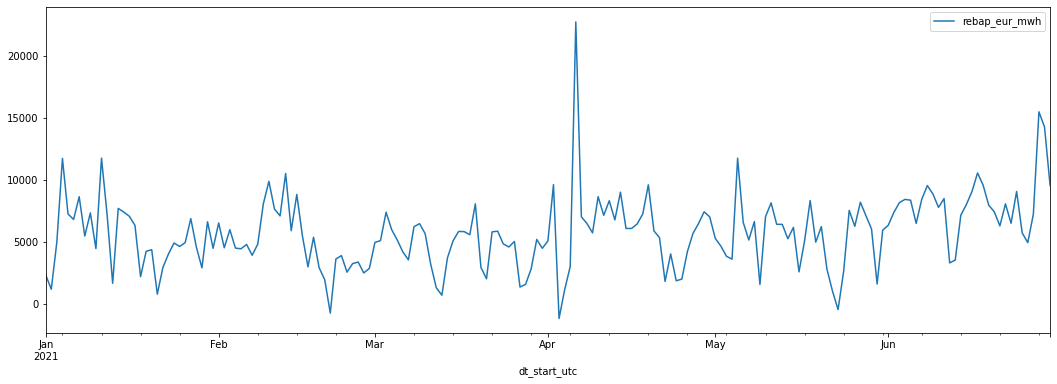

In [40]:
# plots a linear plot over time

power_daily2021 = df_daily[["rebap_eur_mwh"]]['2021-01-01':'2021-07-01']
power_daily2021.plot(figsize=(18,6));

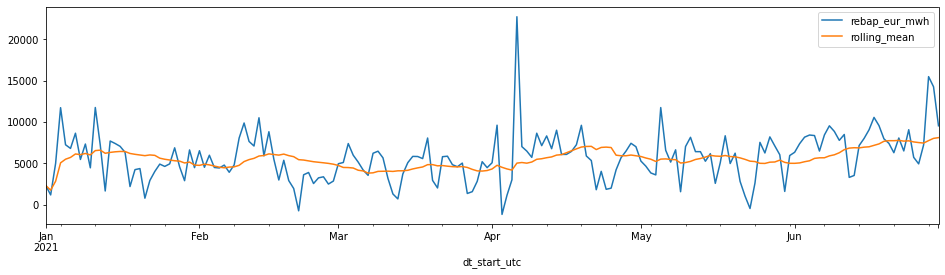

In [41]:
# In order to see a smoother patterns over time, we apply a rolling average 

(
    power_daily2021
    .assign(rolling_mean=lambda x: df_daily["rebap_eur_mwh"].rolling('20D').mean())
    .plot(figsize=(16, 4))
);

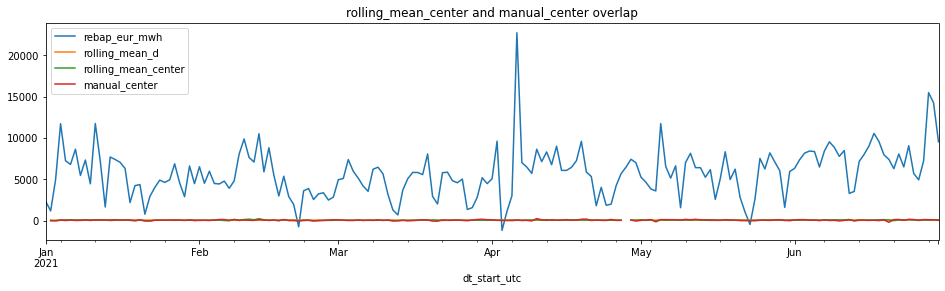

In [42]:
# center the rolling mean

ax = (
    power_daily2021
    .assign(
        rolling_mean_d=lambda x: df["rebap_eur_mwh"].rolling('20D').mean(),
        # ! With `center=True` window size cannot be a time frame
        rolling_mean_center=lambda x: df["rebap_eur_mwh"].rolling(20, center=True).mean(),
        manual_center=lambda x: df["rebap_eur_mwh"].shift(-10)
    )
    .plot(figsize=(16,4))
)

ax.set_title('rolling_mean_center and manual_center overlap');

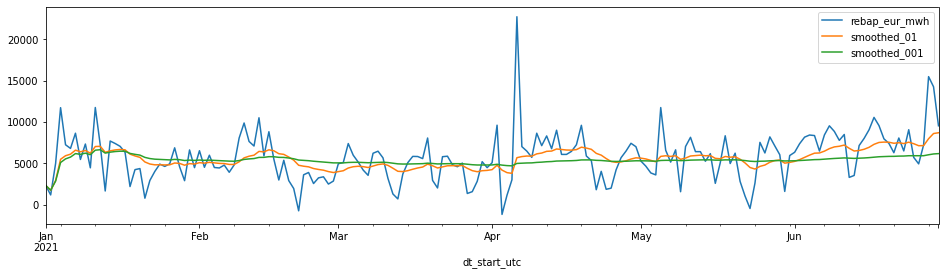

In [43]:
# smooth the timeseries exponentially

(
    power_daily2021
    .assign(
        smoothed_01=lambda df: df["rebap_eur_mwh"].ewm(alpha=0.1).mean(),
        smoothed_001=lambda df: df["rebap_eur_mwh"].ewm(alpha=0.01).mean()
    )
    .plot(figsize=(16, 4))
);